In [1]:
# libraries used
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import svm, tree, datasets, neighbors
from sklearn import metrics
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

#### Apartat B

Dataset utilitzat: Iris

Models implementats: Regressor Logístic, SVM, Desicion tree, Random Forest i KNN

In [2]:
# import the data
iris = datasets.load_iris()

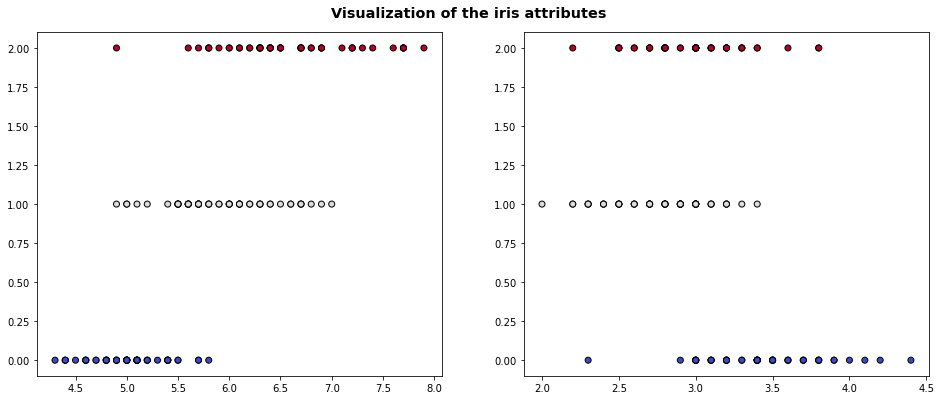

In [3]:
# attributes used
# for now we take only two columns in order to understan better the graphs (since a 4 dimensional dataset won't do)
X = iris.data[:, :2]
y = iris.target

# plot of the data that will be used
fig, sub = plt.subplots(1, 2, figsize=(16,6))
fig.suptitle("Visualization of the iris attributes", fontsize = 'x-large', fontweight = 'bold' )
plt.subplots_adjust(top=0.92)
sub[0].scatter(X[:,0], y, c=y, cmap=plt.cm.coolwarm, edgecolors='k') # long sepalo
sub[1].scatter(X[:,1], y, c=y, cmap=plt.cm.coolwarm, edgecolors='k') # amp sepalo


In [4]:
# parametres for the logistic regressor and the svm
n_classes = 3
sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

Regressor logístic

In [5]:
# fit logistic regressor function
def fit_lr(X, y, part = 0.6):
    # gather the data
    x_t, x_v, y_t, y_v = train_test_split(X, y, train_size=part)
    # create and train the regressor
    logireg = LogisticRegression(C=2.0, fit_intercept=True, penalty='l2', tol=0.001) 
    logireg.fit(x_t, y_t)
    probs = logireg.predict_proba(x_v)
    # show the results
    #print ("Correct classification Logistic", part, "% of the data:", logireg.score(x_v, y_v))
    return logireg.score(x_v, y_v), probs, y_v

# tests
"""
for part in sizes:
    fit_lr(X, y, part)
"""

'\nfor part in sizes:\n    fit_lr(X, y, part)\n'

SVM

In [6]:
# fit svm function
def fit_svm(X, y, part = 0.6):
    # gather the data
    x_t, x_v, y_t, y_v = train_test_split(X, y, train_size=part)
    # create and train the regressor
    svc = svm.SVC(C=10.0, kernel='rbf', gamma=0.9, probability=True) # creem el regresor svm    
    svc.fit(x_t, y_t) # l'entrenem 
    probs = svc.predict_proba(x_v) # used in the precision recall
    # show the results
    # print ("Correct classification SVM ", part, "% of the data: ", svc.score(x_v, y_v))
    return svc.score(x_v, y_v), probs, y_v
"""    
for part in sizes:
    fit_svm(X, y, part)
"""

'    \nfor part in sizes:\n    fit_svm(X, y, part)\n'

Decision tree

In [7]:
# decision tree function
def decision_tree_fit(X, y, part = 0.6):
    x_t, x_v, y_t, y_v = train_test_split(X, y, train_size=part)
    dt = tree.DecisionTreeClassifier()
    dt.fit(x_t, y_t)
    probs = dt.predict_proba(x_v)
    y_pred=dt.predict(x_v)
    #print ("Correct classification decision tree", part, "% of the data: ", metrics.accuracy_score(y_v, y_pred))
    return metrics.accuracy_score(y_v, y_pred), probs, y_v
"""
for part in sizes:
    decision_tree_fit(X, y, part)
"""

'\nfor part in sizes:\n    decision_tree_fit(X, y, part)\n'

Random Forest

In [8]:
from sklearn.ensemble import RandomForestClassifier
# random forest function :)
def fit_rf(i,X, y, part = 0.6):
    
    x_t, x_v, y_t, y_v = train_test_split(X, y, train_size=part)
    
    clf = RandomForestClassifier(n_estimators=i*3)
    clf.fit(x_t,y_t)
    probs = clf.predict_proba(x_v)
    y_pred=clf.predict(x_v)

    #print("Accuracy:",i,metrics.accuracy_score(y_v, y_pred))
    return metrics.accuracy_score(y_v, y_pred),probs,y_v

# habria que hacer un pca para conseguir 3 atributos o 

KNN

In [9]:
# KNN function
def fit_KNN(X, y, part = 0.6, n =7):
    
    x_t, x_v, y_t, y_v = train_test_split(X, y, train_size=part)
    
    clf = neighbors.KNeighborsClassifier(n_neighbors=n)
    clf.fit(x_t,y_t)
    probs = clf.predict_proba(x_v)
    y_pred=clf.predict(x_v)

    #print("Accuracy:",i,metrics.accuracy_score(y_v, y_pred))
    return metrics.accuracy_score(y_v, y_pred), probs, y_v
"""
for i in range(1, 51):
    fit_KNN(X, y)
"""

'\nfor i in range(1, 51):\n    fit_KNN(X, y)\n'

In [11]:
# accuracy matrix of the different models

acc_r=np.zeros((10,5))
for i in range(10): 
    acc_r[i][0],*_ = fit_KNN(X, y)
    acc_r[i][1],*_ = fit_rf(15,X, y)
    acc_r[i][2],*_ = decision_tree_fit(X, y)
    acc_r[i][3],*_ = fit_svm(X, y, part = 0.6)
    acc_r[i][4],*_ = fit_lr(X, y, part = 0.6)
    
print(acc_r)

[[0.76666667 0.75       0.66666667 0.85       0.81666667]
 [0.76666667 0.66666667 0.65       0.68333333 0.76666667]
 [0.76666667 0.8        0.63333333 0.75       0.81666667]
 [0.85       0.71666667 0.68333333 0.78333333 0.81666667]
 [0.9        0.71666667 0.73333333 0.83333333 0.81666667]
 [0.8        0.75       0.68333333 0.76666667 0.71666667]
 [0.8        0.65       0.7        0.78333333 0.75      ]
 [0.8        0.68333333 0.71666667 0.71666667 0.85      ]
 [0.75       0.66666667 0.66666667 0.8        0.8       ]
 [0.71666667 0.75       0.61666667 0.81666667 0.78333333]]


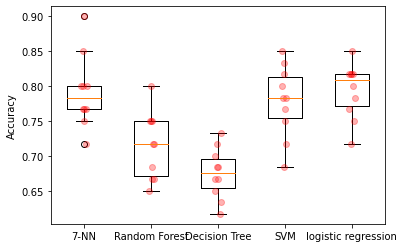

In [12]:
# accuracy boxplot
plt.boxplot(acc_r);
for i in range(5):
    xderiv = (i+1)*np.ones(acc_r[:,i].shape)+(np.random.rand(10,)-0.5)*0.1
    plt.plot(xderiv,acc_r[:,i],'ro',alpha=0.3)
    
ax = plt.gca()
ax.set_xticklabels(['7-NN','Random Forest','Decision Tree','SVM', 'logistic regression'])
plt.ylabel('Accuracy')
plt.savefig("error_ms_1.png",dpi=300, bbox_inches='tight')

### PRECISION RECALL CURVE

In [35]:
from sklearn.metrics import f1_score, precision_recall_curve, average_precision_score, roc_curve, auc

In [13]:
def recall_curve(probs, y_v):
    precision = {}
    recall = {}
    average_precision = {}
    plt.figure()
    for i in range(n_classes):
        precision[i], recall[i], _ = precision_recall_curve(y_v == i, probs[:, i])
        average_precision[i] = average_precision_score(y_v == i, probs[:, i])

        plt.plot(recall[i], precision[i],
        label='Precision-recall curve of class {0} (area = {1:0.2f})'
                               ''.format(i, average_precision[i]))
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.legend(loc="upper right")

Regressor logístic

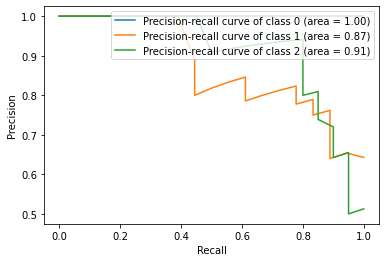

In [21]:
_,probs, y_v = fit_lr(X, y, part = 0.6)
recall_curve(probs, y_v)

SVM

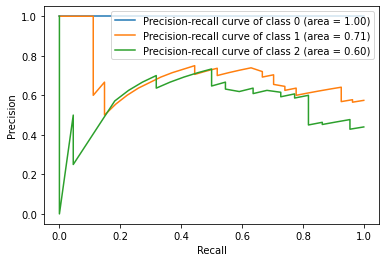

In [22]:
_,probs, y_v = fit_svm(X, y, part = 0.6)
recall_curve(probs, y_v)

Decision tree

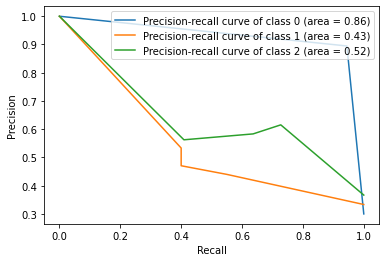

In [23]:
_,probs, y_v = decision_tree_fit(X, y, part = 0.6)
recall_curve(probs, y_v)

Random Forest

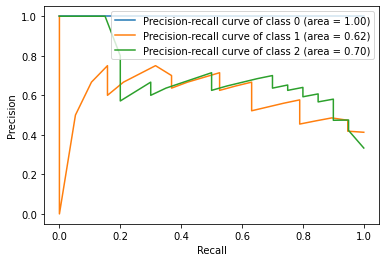

In [25]:
_,probs, y_v = fit_rf(10,X, y, part = 0.6) # 10 trees
recall_curve(probs, y_v)

KNN

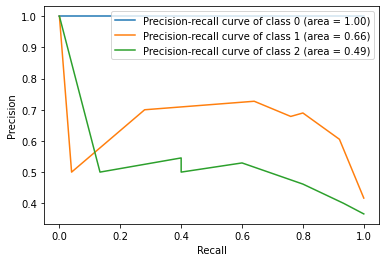

In [27]:
_,probs, y_v = fit_KNN(X, y, part = 0.6)
recall_curve(probs, y_v)

### ROC CURVE

In [30]:
def ROC_curve(probs, y_v):
    fpr = {}
    tpr = {}
    roc_auc = {}
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_v == i, probs[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    # Plot ROC curve
    plt.figure()
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})' ''.format(i, roc_auc[i]))
    plt.legend()

Regressor logístic

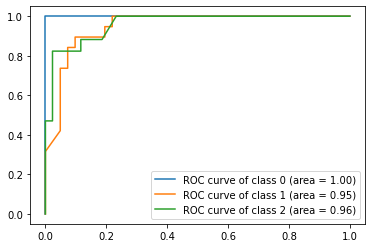

In [31]:
_,probs, y_v = fit_lr(X, y, part = 0.6)
ROC_curve(probs, y_v)

SVM

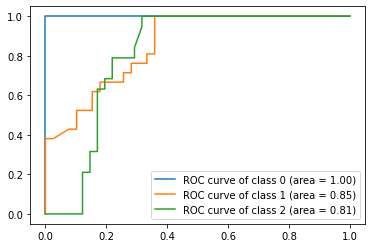

In [29]:
# Compute ROC curve and ROC area for each class
_,probs, y_v = fit_svm(X, y, part = 0.6)
ROC_curve(probs, y_v)

Decision tree

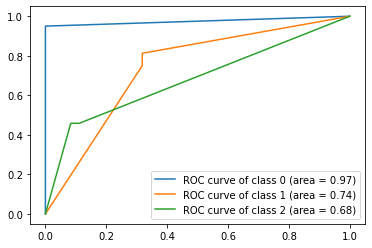

In [32]:
_,probs, y_v = decision_tree_fit(X, y, part = 0.6)
ROC_curve(probs, y_v)

Random Forest 

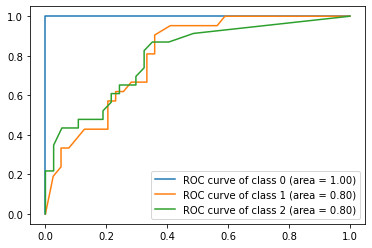

In [34]:
_,probs, y_v = fit_rf(10,X, y, part = 0.6) # 10 trees
ROC_curve(probs, y_v)

KNN

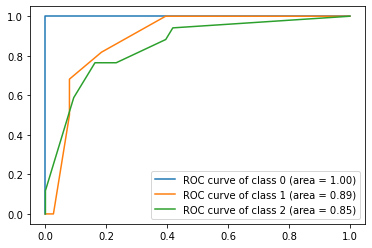

In [33]:
_,probs, y_v = fit_KNN(X, y, part = 0.6)
ROC_curve(probs, y_v)

In [17]:
import numpy as np
import matplotlib.pyplot as plt


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

def show_C_effect(C=1.0, gamma=0.7, degree=3):

    # import some data to play with
    iris = datasets.load_iris()
    # Take the first two features. We could avoid this by using a two-dim dataset
    X = iris.data[:, :2]
    y = iris.target

    # we create an instance of SVM and fit out data. We do not scale our
    # data since we want to plot the support vectors
    # title for the plots
    titles = ('SVC with linear kernel',
              'LinearSVC (linear kernel)',
              'SVC with RBF kernel',
              'SVC with polynomial (degree 3) kernel')

    #C = 1.0  # SVM regularization parameter
    models = (svm.SVC(kernel='linear', C=C),
              svm.LinearSVC(C=C, max_iter=1000000),
              svm.SVC(kernel='rbf', gamma=gamma, C=C),
              svm.SVC(kernel='poly', degree=degree, gamma='auto', C=C))
    models = (clf.fit(X, y) for clf in models)

    plt.close('all')
    fig, sub = plt.subplots(2, 2, figsize=(14,9))
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1)

    for clf, title, ax in zip(models, titles, sub.flatten()):
        plot_contours(ax, clf, xx, yy,
                      cmap=plt.cm.coolwarm, alpha=0.8)
        ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xlabel('Sepal length')
        ax.set_ylabel('Sepal width')
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(title)

    plt.show()


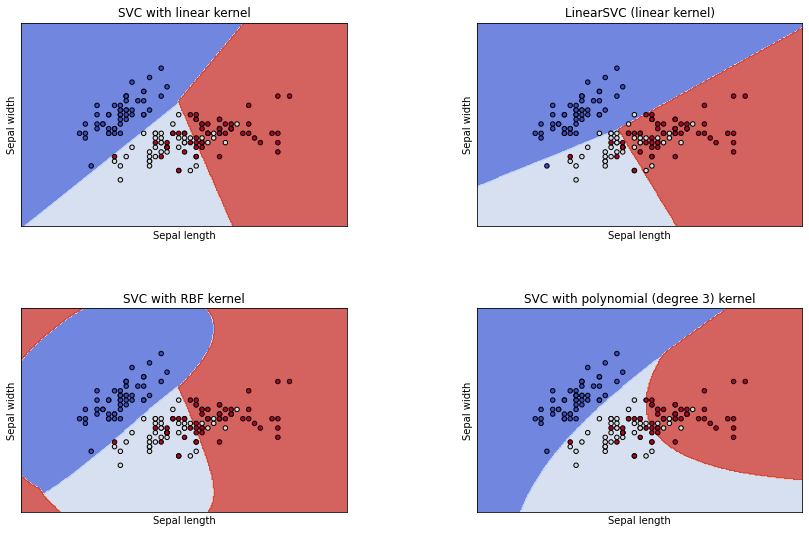

In [18]:
show_C_effect(C=0.2)